# EnKF Experiments - GCS benchmark

## Imports

In [30]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy.stats import shapiro, kruskal
import seaborn as sns
import sys

In [31]:
sys.path.append('../../../../stationsim/')
from ensemble_kalman_filter import EnsembleKalmanFilter, AgentIncluder
from stationsim_gcs_model import Model

In [32]:
sys.path.append('../')
from experiment_utils import Modeller, Processor, Visualiser

In [33]:
%matplotlib inline
np.random.seed(42)

## Functions

In [34]:
def tidy_dataframe(df, independent_col: str, dependent_cols: list):
    output = list()
    
    for i, row in df.iterrows():
        for col in dependent_cols:
            d = {independent_col: row[independent_col],
                 'variable':  col,
                 'value': row[col]}
            output.append(d)
    
    output = pd.DataFrame(output)
    return output

## Data paths

In [35]:
data_dir = '../results/data/baseline/'
model_dir = '../results/models/baseline/'
fig_dir = '../results/figures/baseline/'

## Experiment 0 - Baseline

### Run experiment

#### Benchmark

Set population size to use for benchmarking:

In [25]:
p = 100

Run benchmark:

In [26]:
Modeller.run_enkf_benchmark(ensemble_size=100)

../../../../stationsim/ensemble_kalman_filter.py:174: RuntimeWarning: EnKF received unexpected attribute (vanilla_ensemble_size).
  warns.warn(w, RuntimeWarning)


Running Ensemble Kalman Filter...
max_iterations:	None
ensemble_size:	None
assimilation_period:	None
pop_size:	None
filter_type:	EnsembleKalmanFilterType.STATE
inclusion_type:	AgentIncluder.BASE
ensemble_errors:	False


#### Collisions

In [27]:
# Modeller.run_model_collisions()

### Analysis

#### Benchmark

In [28]:
with open(model_dir + 'baseline.pkl', 'rb') as f:
    baseline_filter = pickle.load(f)

baseline_results = pd.DataFrame(baseline_filter.forecast_error)
baseline_results.head()

,time,forecast
0,0,0.000000
1,1,1.596380
2,2,1.595245
3,3,1.594111
4,4,1.592978


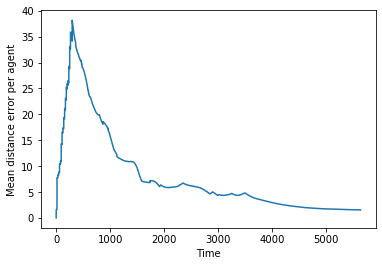

In [29]:
plt.figure()
sns.lineplot(x='time', y='forecast', data=baseline_results)
plt.xlabel('Time')
plt.ylabel('Mean distance error per agent')
plt.savefig(fig_dir + f'baseline_errors_{p}.pdf')
plt.show()

#### Collisions

In [36]:
collisions = pd.read_csv(data_dir + 'model_collisions.csv')
collisions.head()

,Unnamed: 0,collisions,population_size
0,0,31,5
1,1,8,5
2,2,4,5
3,3,4,5
4,4,59,5


In [37]:
if 'Unnamed: 0' in collisions.columns:
    collisions = collisions.drop('Unnamed: 0', axis=1)

In [38]:
collisions.head()

,collisions,population_size
0,31,5
1,8,5
2,4,5
3,4,5
4,59,5


In [39]:
collisions['normalised_collisions'] = collisions['collisions'] / collisions['population_size']
collisions.head()

,collisions,population_size,normalised_collisions
0,31,5,6.2
1,8,5,1.6
2,4,5,0.8
3,4,5,0.8
4,59,5,11.8


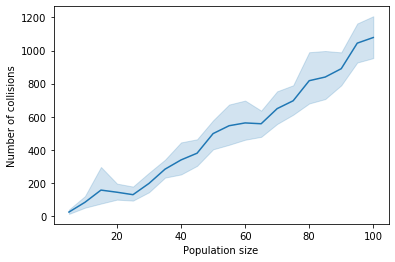

In [42]:
plt.figure()
sns.lineplot(x='population_size', y='collisions', data=collisions)
plt.xlabel('Population size')
plt.ylabel('Number of collisions')
plt.savefig(fig_dir + 'baseline_collisions.pdf')
plt.show()

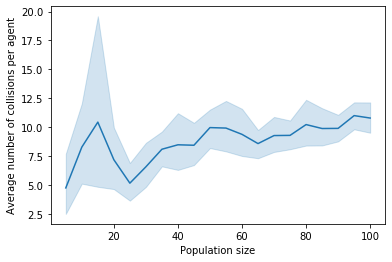

In [43]:
plt.figure()
sns.lineplot(x='population_size', y='normalised_collisions', data=collisions)
plt.xlabel('Population size')
plt.ylabel('Average number of collisions per agent')
plt.savefig(fig_dir + 'baseline_collisions_normalised.pdf')
plt.show()